1. K-Means Clustering (From Scratch)

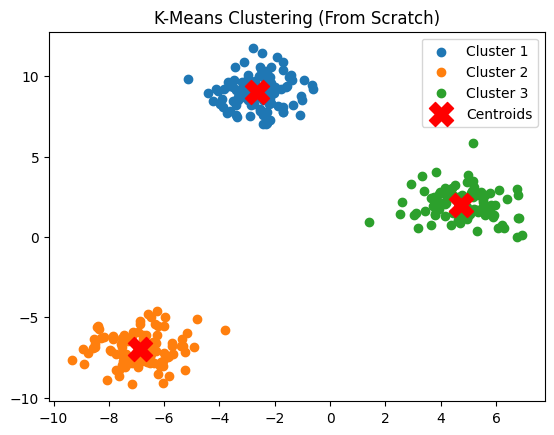

Silhouette Score: 0.85


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Helper function to calculate the Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-Means implementation
class KMeans:
    def __init__(self, k, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def initialize_centroids(self, X):
        np.random.seed(42)
        random_indices = np.random.permutation(len(X))[:self.k]
        return X[random_indices]

    def assign_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(idx)
        return clusters

    def calculate_new_centroids(self, X, clusters):
        centroids = np.zeros((self.k, X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_points = X[cluster]
            centroids[cluster_idx] = np.mean(cluster_points, axis=0)
        return centroids

    def has_converged(self, old_centroids, new_centroids):
        distances = [euclidean_distance(old, new) for old, new in zip(old_centroids, new_centroids)]
        return sum(distances) < self.tolerance

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(X, self.centroids)
            new_centroids = self.calculate_new_centroids(X, self.clusters)
            if self.has_converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        cluster_labels = np.zeros(len(X))
        for idx, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            cluster_labels[idx] = np.argmin(distances)
        return cluster_labels

# Applying K-Means from scratch
k = 3
kmeans = KMeans(k=k)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

# Visualize the clusters
for cluster_idx, cluster in enumerate(kmeans.clusters):
    cluster_points = X[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx+1}')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering (From Scratch)')
plt.legend()
plt.show()

# Evaluate clustering performance
sil_score = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {sil_score:.2f}')


2. Hierarchical Clustering

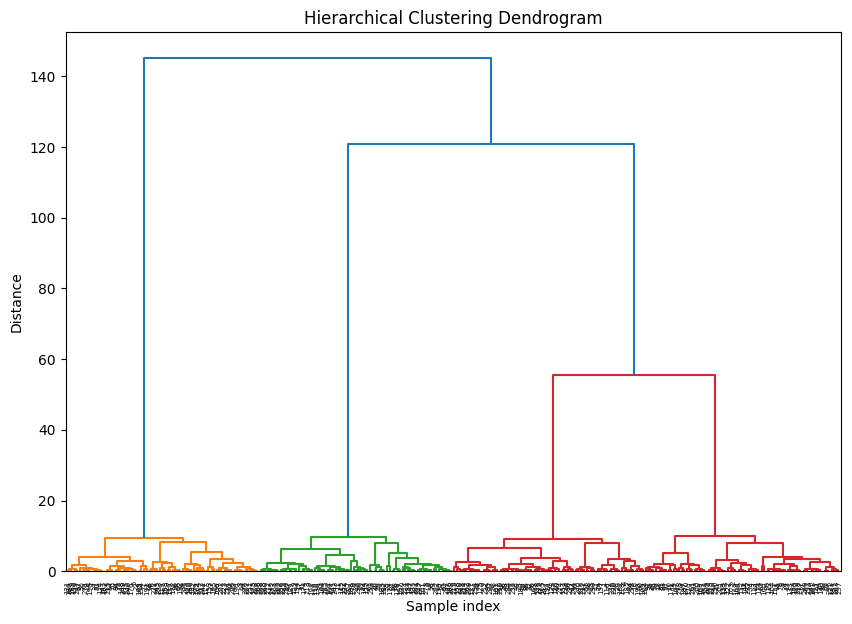

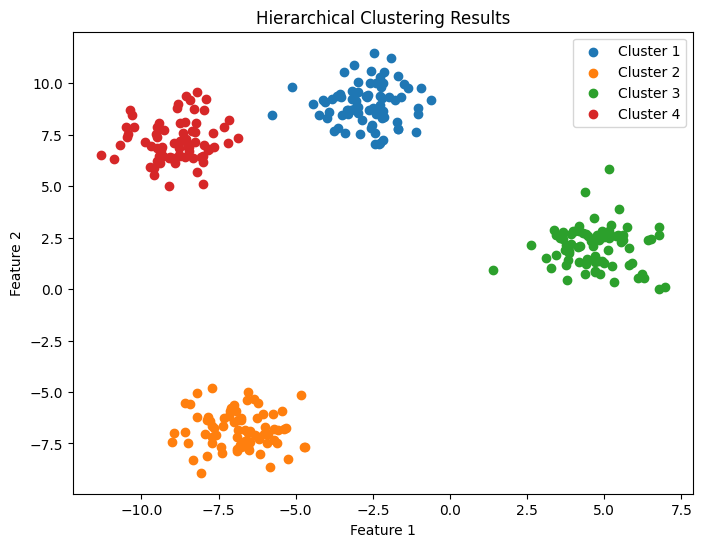

Silhouette Score: 0.79


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform hierarchical clustering using linkage method
linkage_matrix = linkage(X, method='ward')  # Ward minimizes variance between clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X)

# Visualize the resulting clusters
plt.figure(figsize=(8, 6))
for cluster_idx in np.unique(cluster_labels):
    cluster_points = X[cluster_labels == cluster_idx]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx+1}')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Evaluate clustering performance
sil_score = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {sil_score:.2f}')

3. Gaussian Mixture Models Clustering

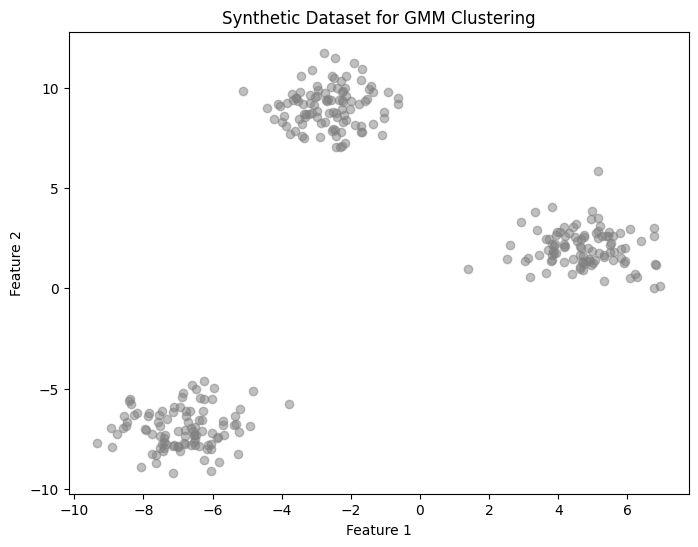

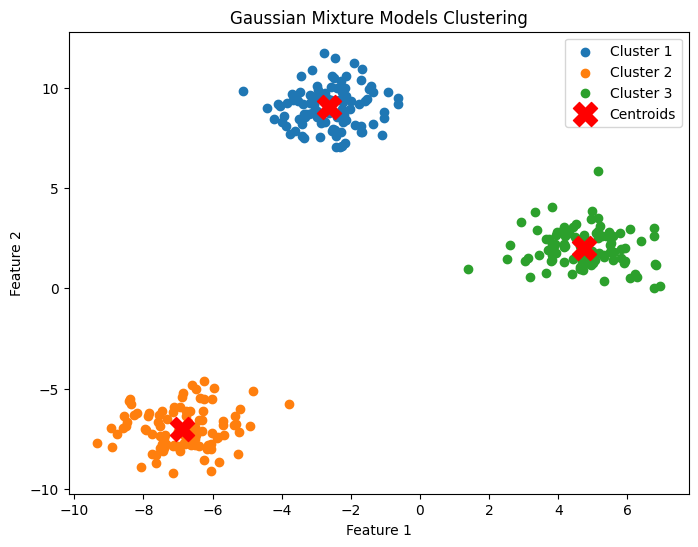

Silhouette Score: 0.85
BIC: 2418.1120223301577
AIC: 2355.147720261002


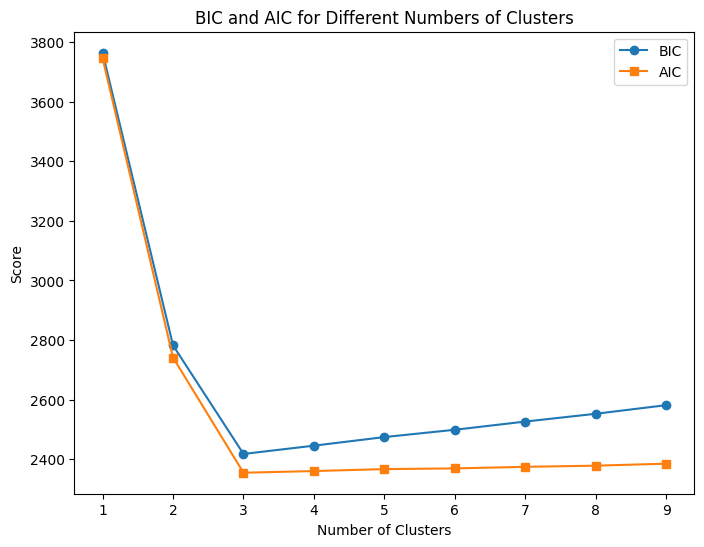

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title('Synthetic Dataset for GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
gmm.fit(X)
cluster_labels = gmm.predict(X)

# Visualize the GMM clustering results
plt.figure(figsize=(8, 6))
for cluster_idx in np.unique(cluster_labels):
    cluster_points = X[cluster_labels == cluster_idx]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx+1}')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Gaussian Mixture Models Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Evaluate clustering performance
sil_score = silhouette_score(X, cluster_labels)
bic = gmm.bic(X)
aic = gmm.aic(X)
print(f'Silhouette Score: {sil_score:.2f}')
print(f'BIC: {bic}')
print(f'AIC: {aic}')

# Optional: Experiment with different number of clusters
bic_values = []
aic_values = []
for k in range(1, 10):
    gmm_k = GaussianMixture(n_components=k, random_state=random_state)
    gmm_k.fit(X)
    bic_values.append(gmm_k.bic(X))
    aic_values.append(gmm_k.aic(X))

# Plot BIC and AIC to choose optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), bic_values, marker='o', label='BIC')
plt.plot(range(1, 10), aic_values, marker='s', label='AIC')
plt.title('BIC and AIC for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()


4. DBSCAN Clustering Using PyCaret

In [11]:
# Install PyCaret if not already installed
!pip install pycaret -q

# Import necessary libraries
!pip install scikit-learn==0.23.2 -q
from pycaret.clustering import *
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Convert dataset to DataFrame (PyCaret requires DataFrame input)
data = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Setup PyCaret clustering environment
clustering_setup = setup(data, normalize=True, silent=True, verbose=False)

# Create and apply the DBSCAN model
dbscan_model = create_model('dbscan', eps=0.5, min_samples=5)

# Assign clusters to the dataset
dbscan_results = assign_model(dbscan_model)

# Visualize the clusters
plot_model(dbscan_model, plot='cluster')

# Evaluate clustering performance
cluster_labels = dbscan_results['Cluster']
sil_score = silhouette_score(data, cluster_labels, metric='euclidean')
print(f'Silhouette Score: {sil_score:.2f}')

# Optional: Inspect assigned clusters
print("Cluster Assignments:")
print(dbscan_results.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 23.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py)

5. Anomaly Detection Using PyOD

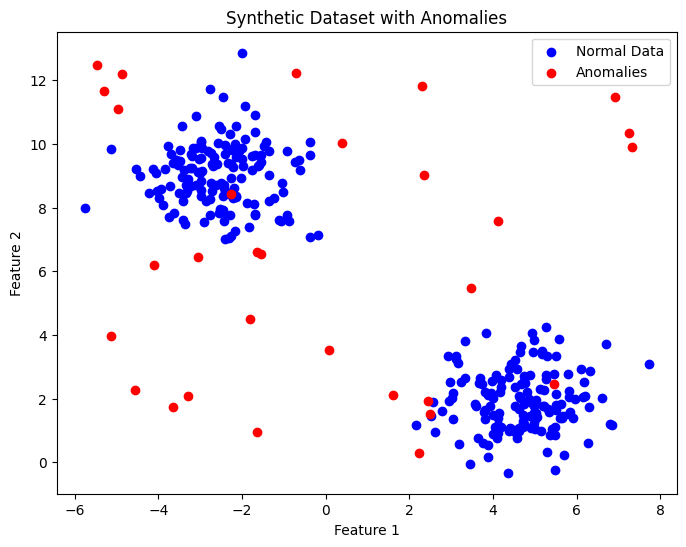

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97       300
     Anomaly       0.67      0.73      0.70        30

    accuracy                           0.94       330
   macro avg       0.82      0.85      0.83       330
weighted avg       0.95      0.94      0.94       330



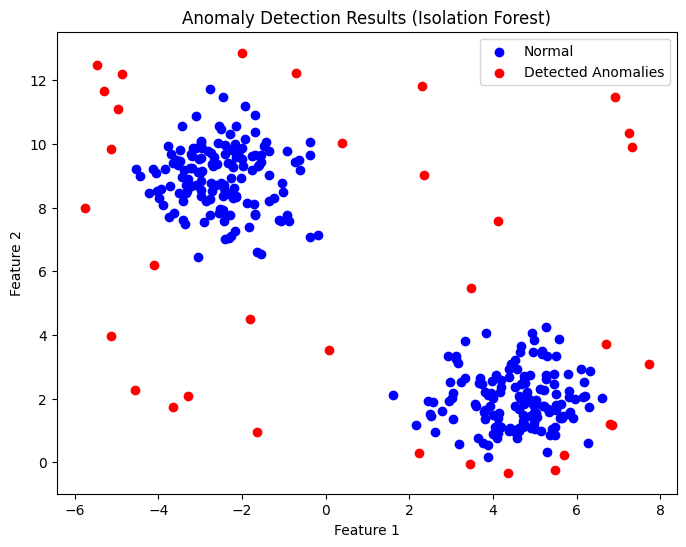

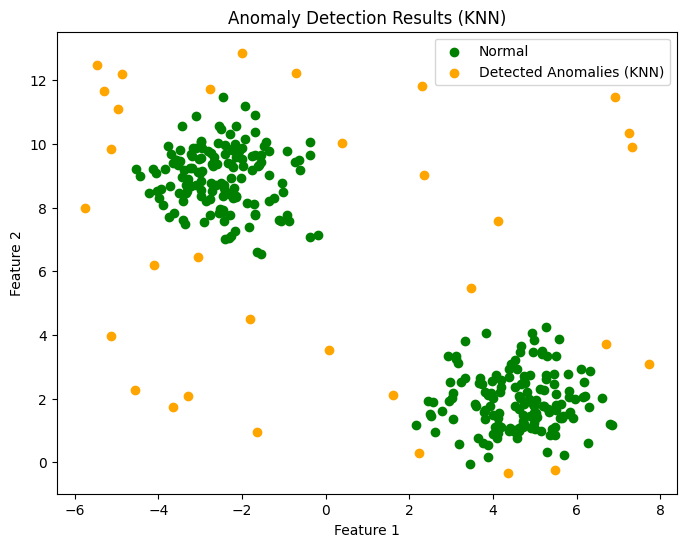

In [10]:
# Install PyOD if not already installed
!pip install pyod -q

# Import necessary libraries
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from sklearn.metrics import classification_report, confusion_matrix

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 2
random_state = 42
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Introduce anomalies (add noise)
n_anomalies = 30
np.random.seed(random_state)
X_anomalies = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(n_anomalies, n_features))
y_anomalies = np.ones(n_anomalies) * -1  # Label anomalies as -1

# Combine the data
X_full = np.vstack([X, X_anomalies])
y_full = np.hstack([y, y_anomalies])

# Visualize the dataset with anomalies
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal Data')
plt.scatter(X_anomalies[:, 0], X_anomalies[:, 1], c='red', label='Anomalies')
plt.title('Synthetic Dataset with Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Use PyOD's Isolation Forest for anomaly detection
model = IForest(random_state=random_state)
model.fit(X_full)

# Predict anomalies
y_pred = model.predict(X_full)  # 0 for normal, 1 for anomalies

# Evaluate performance
print("Classification Report:")
print(classification_report(y_full == -1, y_pred == 1, target_names=["Normal", "Anomaly"]))

# Visualize the detected anomalies
plt.figure(figsize=(8, 6))
plt.scatter(X_full[y_pred == 0, 0], X_full[y_pred == 0, 1], c='blue', label='Normal')
plt.scatter(X_full[y_pred == 1, 0], X_full[y_pred == 1, 1], c='red', label='Detected Anomalies')
plt.title('Anomaly Detection Results (Isolation Forest)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Optional: Use KNN for anomaly detection
knn_model = KNN()
knn_model.fit(X_full)

# Predict anomalies using KNN
y_pred_knn = knn_model.predict(X_full)

# Visualize the detected anomalies (KNN)
plt.figure(figsize=(8, 6))
plt.scatter(X_full[y_pred_knn == 0, 0], X_full[y_pred_knn == 0, 1], c='green', label='Normal')
plt.scatter(X_full[y_pred_knn == 1, 0], X_full[y_pred_knn == 1, 1], c='orange', label='Detected Anomalies (KNN)')
plt.title('Anomaly Detection Results (KNN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

6. Clustering of Time-Series Data Using Pretrained Models

In [17]:
# Install necessary libraries
!pip install tslearn -q
!pip install matplotlib -q
# Remove the version constraint for scikit-learn and install the latest version
!pip install scikit-learn -q

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


# Load a time-series dataset
X_train, y_train = CachedDatasets().load_dataset("Trace")

# Scale the dataset (normalize the time series)
scaler = TimeSeriesScalerMeanVariance()
X_train_scaled = scaler.fit_transform(X_train)

# Visualize a few time series
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(X_train_scaled[i].ravel(), label=f'Time Series {i+1}')
plt.title("Sample Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Use TimeSeriesKMeans for clustering
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
cluster_labels = model.fit_predict(X_train_scaled)

# Visualize the cluster centroids
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.plot(model.cluster_centers_[i].ravel(), label=f'Cluster {i+1}')
plt.title("Cluster Centroids (DTW-based Clustering)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Evaluate clustering quality
from sklearn.metrics import silhouette_score

# Flatten time series for Silhouette Score computation
X_flattened = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
sil_score = silhouette_score(X_flattened, cluster_labels, metric="euclidean")
print(f"Silhouette Score: {sil_score:.2f}")

# Visualize clusters with their time series
plt.figure(figsize=(12, 8))
for cluster_id in range(n_clusters):
    cluster_data = X_train_scaled[cluster_labels == cluster_id]
    for ts in cluster_data:
        plt.plot(ts.ravel(), alpha=0.5)
    plt.plot(model.cluster_centers_[cluster_id].ravel(), label=f'Cluster {cluster_id+1}', linewidth=2, c='red')
plt.title("Clusters with Assigned Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

ValueError: too many values to unpack (expected 2)

7. Document Clustering Using LLM Embeddings


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Silhouette Score: 0.05


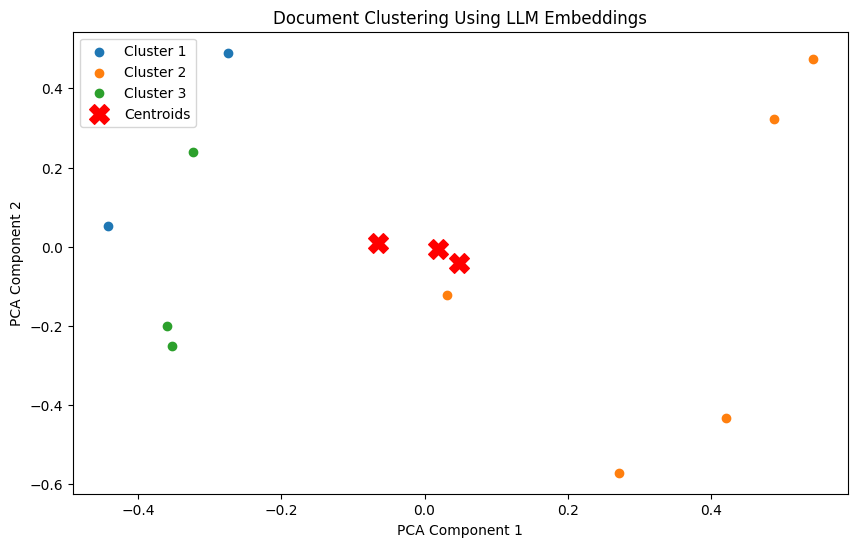


Cluster 1:
 - The new smartphone model has amazing features.
 - Scientists discover a new species of butterfly.

Cluster 2:
 - The stock market crashed today.
 - Climate change is causing rising sea levels.
 - Electric cars are becoming more popular worldwide.
 - Global warming is affecting polar bears.
 - Cryptocurrency prices are fluctuating dramatically.

Cluster 3:
 - Technology companies are booming in Silicon Valley.
 - Space exploration is advancing with new technologies.
 - Artificial Intelligence is transforming the healthcare industry.


In [15]:
 # Install necessary libraries
!pip install sentence-transformers -q
!pip install sklearn -q
!pip install matplotlib -q

# Import necessary libraries
!pip install --upgrade scikit-learn
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sample dataset: A list of documents
documents = [
    "The stock market crashed today.",
    "Technology companies are booming in Silicon Valley.",
    "Climate change is causing rising sea levels.",
    "The new smartphone model has amazing features.",
    "Scientists discover a new species of butterfly.",
    "Space exploration is advancing with new technologies.",
    "Electric cars are becoming more popular worldwide.",
    "Artificial Intelligence is transforming the healthcare industry.",
    "Global warming is affecting polar bears.",
    "Cryptocurrency prices are fluctuating dramatically."
]

# Load a pre-trained model for embeddings (Sentence-BERT)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the documents
embeddings = model.encode(documents)

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Evaluate clustering quality using Silhouette Score
sil_score = silhouette_score(embeddings, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

# Visualize the clustering results using PCA (dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_points = reduced_embeddings[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Document Clustering Using LLM Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Display clustered documents
clustered_docs = {i: [] for i in range(n_clusters)}
for idx, label in enumerate(cluster_labels):
    clustered_docs[label].append(documents[idx])

for cluster_id, docs in clustered_docs.items():
    print(f"\nCluster {cluster_id+1}:")
    for doc in docs:
        print(f" - {doc}")

8. Image Clustering Using ImageBind

In [18]:
# Install necessary libraries
!pip install imagebind -q
!pip install matplotlib -q
!pip install sklearn -q
!pip install pillow -q

# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

# Load a pretrained ImageBind model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = imagebind_model.imagebind_huge(pretrained=True).to(device)

# Load a sample dataset of images (use your custom dataset)
# Here, we'll use a placeholder: synthetic dataset of colored squares
def generate_synthetic_images(n_images=10):
    images = []
    for i in range(n_images):
        img = Image.fromarray(np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8))
        images.append(img)
    return images

images = generate_synthetic_images()

# Preprocess images
transform = Compose([Resize((224, 224)), ToTensor(), Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
image_tensors = torch.stack([transform(img) for img in images]).to(device)

# Extract embeddings using ImageBind
with torch.no_grad():
    image_embeddings = model({ModalityType.VISION: image_tensors})[ModalityType.VISION].cpu().numpy()

# Perform clustering on embeddings
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(image_embeddings)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(image_embeddings)

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_points = reduced_embeddings[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Image Clustering Using ImageBind')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Visualize clustered images
for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id+1} Images:")
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    for idx in cluster_indices:
        plt.imshow(images[idx])
        plt.axis('off')
        plt.show()

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'imagebind'

9. Audio Clustering Using ImageBind

In [19]:
# Install necessary libraries
!pip install imagebind -q
!pip install torchaudio -q
!pip install sklearn -q
!pip install matplotlib -q

# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import torchaudio
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

# Load a pretrained ImageBind model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = imagebind_model.imagebind_huge(pretrained=True).to(device)

# Generate synthetic audio data (or load your own audio dataset)
def generate_synthetic_audio(num_samples=10, duration=1.0, sample_rate=16000):
    audios = []
    for _ in range(num_samples):
        audio = np.random.uniform(-1, 1, int(duration * sample_rate)).astype(np.float32)
        audios.append(audio)
    return audios

synthetic_audios = generate_synthetic_audio()
sample_rate = 16000  # Standard audio sampling rate

# Convert synthetic audio to tensors
audio_tensors = []
for audio in synthetic_audios:
    audio_tensor = torch.tensor(audio).unsqueeze(0).to(device)  # Add batch dimension
    audio_tensors.append(audio_tensor)

# Extract embeddings using ImageBind
with torch.no_grad():
    audio_embeddings = model({ModalityType.AUDIO: audio_tensors})[ModalityType.AUDIO].cpu().numpy()

# Perform clustering on embeddings
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(audio_embeddings)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(audio_embeddings)

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_points = reduced_embeddings[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Audio Clustering Using ImageBind')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Assign audio samples to clusters and display
for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id+1} Audio Samples:")
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    for idx in cluster_indices:
        print(f"Audio {idx+1}:")
        # Play the audio (Optional: works in environments that support audio playback)
        torchaudio.save(f"audio_sample_{idx}.wav", synthetic_audios[idx].reshape(1, -1), sample_rate)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'imagebind'